# Exercise 11.2

# POLYNOMIAL FIT

## Set Up

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [3]:
def f(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

In [22]:
def create_model(n_lay=1, n=1):
    model = tf.keras.Sequential([tf.keras.Input(shape=(1,)), Dense(1)])
    for i in range(1, n_lay):
        model.add(Dense(n))
    return model

In [15]:
sig = .1
n_points = 5000
epochs = 20
bsize = 32

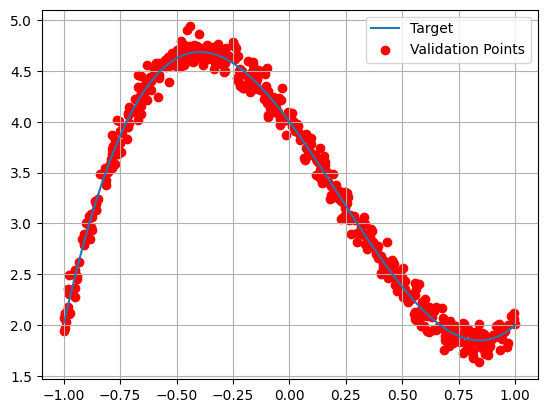

In [16]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_points)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = f(x_valid)

sigma = sig
y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

plt.plot(x_valid, y_target, label='Target')
plt.scatter(x_valid, y_valid, color='r', label='Validation Points')
plt.legend()
plt.grid(True)
plt.show()

## Training

In [34]:
#np.random.seed(0)
#tf.random.set_seed(0)
random.seed(0)

model = create_model()
act_func = 'relu' #most reliable, it seems
#act_func = 'tanh' #very bad apparently
#act_func = 'elu' #sottostima in prima metà, sovrastima in seconda metà intervallo
#act_func = 'linear' #catastrofica

model.add(Dense(20, activation=act_func))
model.add(Dense(5, activation=act_func))
model.add(Dense(10, activation=act_func))
model.add(Dense(47, activation=act_func))
model.add(Dense(15, activation=act_func))
model.add(Dense(1, activation=act_func))

opt = 'rmsprop'
loss_func = 'mse'
model.compile(optimizer=opt, loss=loss_func, metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=bsize, epochs=epochs, shuffle=True, validation_data=(x_valid,y_valid))

print('Evaluation: ')
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print('Evaluation on target data: ')
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.6715 - mse: 6.6715 - val_loss: 0.5317 - val_mse: 0.5317
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4713 - mse: 0.4713 - val_loss: 0.4103 - val_mse: 0.4103
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3454 - mse: 0.3454 - val_loss: 0.2482 - val_mse: 0.2482
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1799 - mse: 0.1799 - val_loss: 0.0844 - val_mse: 0.0844
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

## Results

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


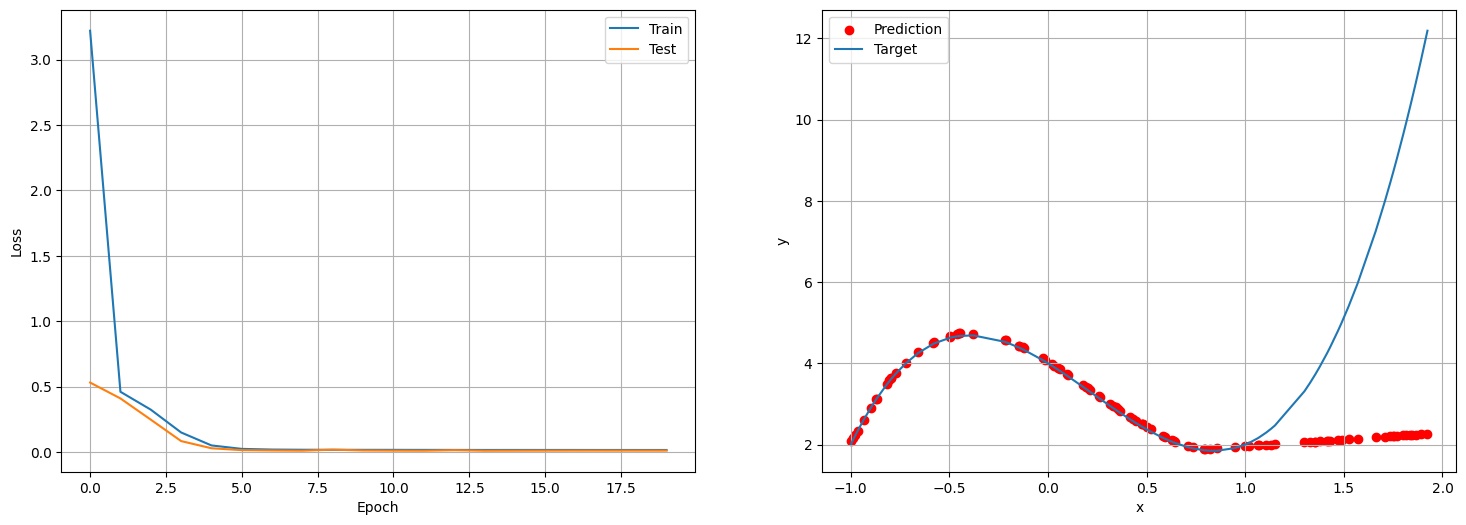

In [35]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()

# PREDICTIONS
plt.subplot(1,2,2)
x_pred = np.random.uniform(-1, 2, 100) 
y_pred = model.predict(x_pred) 
plt.scatter(x_pred, y_pred, color='r', label = "Prediction")
x_pred.sort()
y_tar_new = f(x_pred)
plt.plot(x_pred, y_tar_new, label = "Target")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

From which it's obvious that the model badly fails once we go just outside the region in which the training was done